In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
import seaborn as sns

In [2]:
def read_all_csv_files(directory_path, features, limit=10000):
    # Initialize an empty list to store dataframes from CSV files
    dataframes = []

    # Get a list of all files in the directory
    file_list = os.listdir(directory_path)

    # Loop through each file and check if it's a CSV file
    for file_name in file_list:
        if file_name.endswith('.csv'):
            # Get the full file path
            file_path = os.path.join(directory_path, file_name)
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)
            # Remove leading and trailing spaces from column names
            df.columns = df.columns.str.strip()
            # Append the DataFrame to the list
            dataframes.append(df[features])

    # Merge all DataFrames into a single DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)
    print("Initial Row: {}".format(merged_df.shape[0]))
    
    #applying limit if row_count > limit
    if len(merged_df) > limit:
        print("As Row Exceeds {0}, we are taking upto {1} rows".format(limit, limit))
        merged_df = merged_df.sample(limit, random_state=42)
    
    return merged_df


In [3]:
#Data Sources
PATH = './dataset'
clients = {
    'client_1': f"{PATH}/client_1/client_1_original_dataset.csv",
    'client_2': f"{PATH}/client_2/client_2_original_dataset.csv",
    'client_3': f"{PATH}/client_3/client_3_original_dataset.csv",
    'client_4': f"{PATH}/client_4/client_4_original_dataset.csv"
}

In [4]:
#Tick Names and Numbers
tick_list = list(clients.keys())
tick_numbers = list(range(1, len(tick_list)+1))
print("Tick Lists: {}".format(tick_list))
print("Tick Numbers: {}".format(tick_numbers))

Tick Lists: ['client_1', 'client_2', 'client_3', 'client_4']
Tick Numbers: [1, 2, 3, 4]


In [5]:
for key, element in tqdm(clients.items(), total=len(clients)):
    dataframe = pd.read_csv(element)
    locals()[key] = dataframe
    print(f"---------------------{key}----------------------------------")
    print(dataframe.groupby(['Label']).size().reset_index(name="Count"))
    print("------------------------------------------------------------------")



 25%|███████████████████▌                                                          | 1/4 [00:02<00:08,  2.99s/it]

---------------------client_1----------------------------------
   Label   Count
0      0  202821
1      1  217179
------------------------------------------------------------------


 50%|███████████████████████████████████████                                       | 2/4 [00:05<00:05,  2.90s/it]

---------------------client_2----------------------------------
   Label   Count
0      0  185943
1      1  234057
------------------------------------------------------------------


 75%|██████████████████████████████████████████████████████████▌                   | 3/4 [00:08<00:02,  2.85s/it]

---------------------client_3----------------------------------
   Label   Count
0      0  210000
1      1  210000
------------------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.83s/it]

---------------------client_4----------------------------------
   Label   Count
0      0  210000
1      1  210000
------------------------------------------------------------------


In [6]:
def draw_box_plot(data, tick_numbers, tick_list, title, x_label="", y_label="", show_outliers=False):
    fig, ax = plt.subplots(figsize=(6,4))
    plt.suptitle(title)
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, showfliers=show_outliers, patch_artist=True)
    plt.xticks(tick_numbers, tick_list)
    plt.xticks(rotation=90)
    ax.set_ylabel(y_label)
    plt.show()

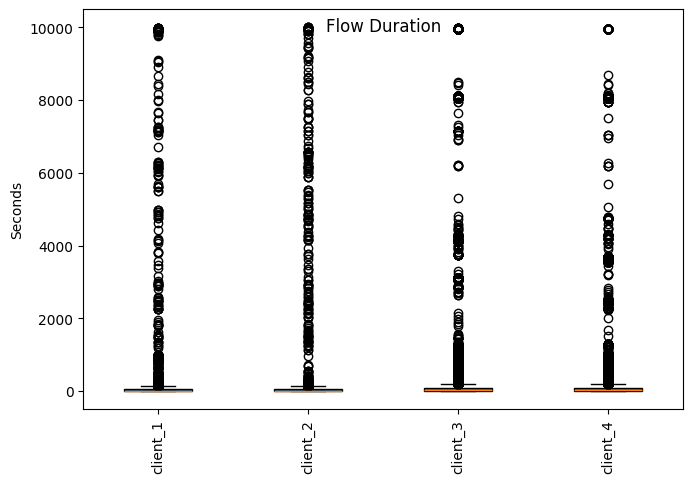

In [7]:
##Flow Duration
data = []
for key, element in clients.items():
    data.append(locals()[key]['Flow Duration']/1000000)

draw_box_plot(data, tick_numbers, tick_list, 'Flow Duration', '', 'Seconds', True)

#draw_box_plot(data, tick_numbers, tick_list, 'Flow Duration', '', 'Seconds', False)


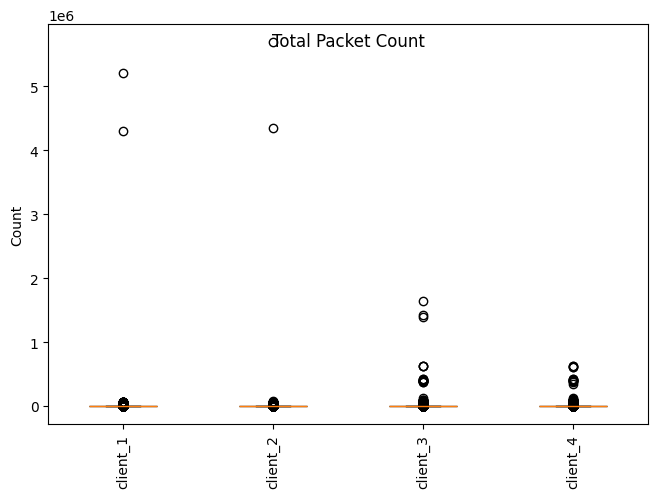

In [8]:
##Total  Packets
data = []
for key, element in clients.items():
    data.append(locals()[key]['Total Bwd packets'] + locals()[key]['Total Fwd Packet'])

draw_box_plot(data, tick_numbers, tick_list, 'Total Packet Count', '', 'Count', True)
#draw_box_plot(data, tick_numbers, tick_list, 'Total Packet Count', '', 'Count', False)    

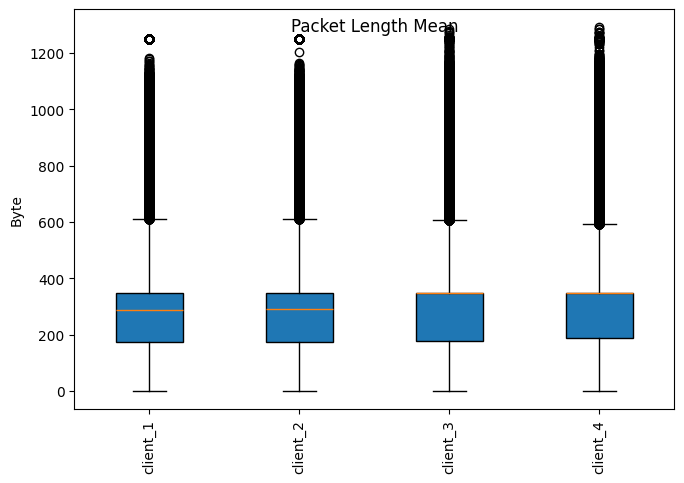

In [9]:
##Total Lenght of Packets Packets
data = []
for key, element in clients.items():
    data.append(locals()[key]['Packet Length Mean'])

draw_box_plot(data, tick_numbers, tick_list, 'Packet Length Mean', '', 'Byte', True)
#draw_box_plot(data, tick_numbers, tick_list, 'Packet Length Mean', '', 'Byte', False)


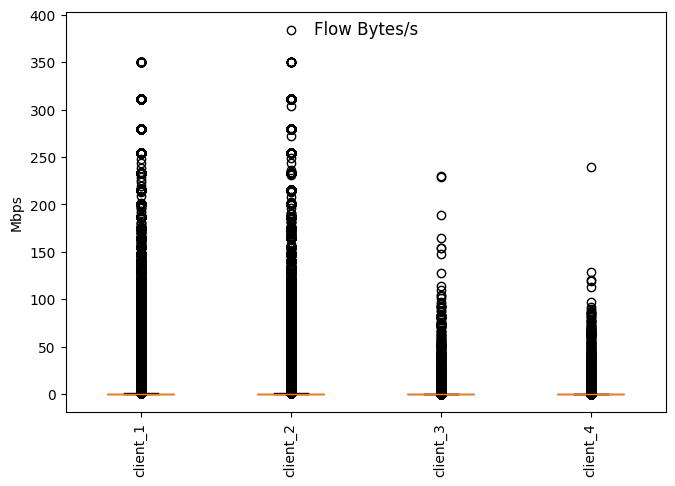

In [10]:
##TFlow Bytes/s (kbps)
data = []
for key, element in clients.items():
    data.append(locals()[key]['Flow Bytes/s']*8/1000000) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Flow Bytes/s', '', 'Mbps', True)
#draw_box_plot(data, tick_numbers, tick_list, 'Flow Bytes/s', '', 'Kbps', False)


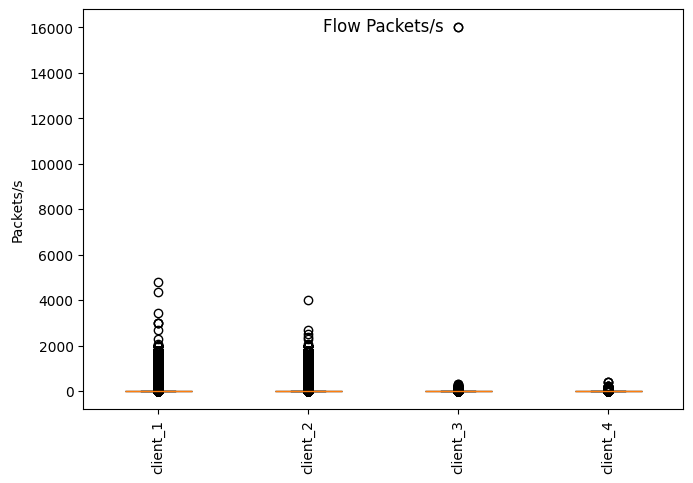

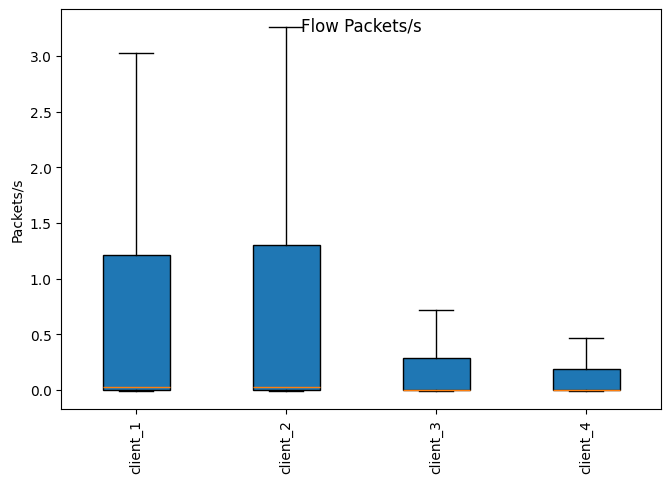

In [11]:
##TFlow Bytes/s (kbps)
data = []
for key, element in clients.items():
    data.append(locals()[key]['Flow Packets/s']*8/1000) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Flow Packets/s', '', 'Packets/s', True)
draw_box_plot(data, tick_numbers, tick_list, 'Flow Packets/s', '', 'Packets/s', False)

## Fwd PSH flags: Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)

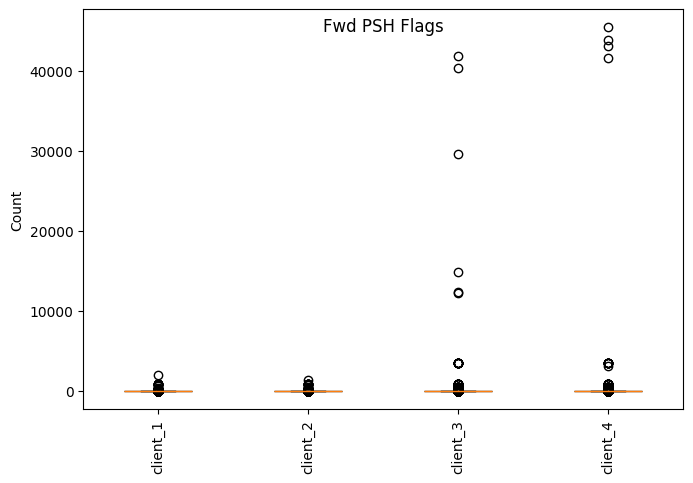

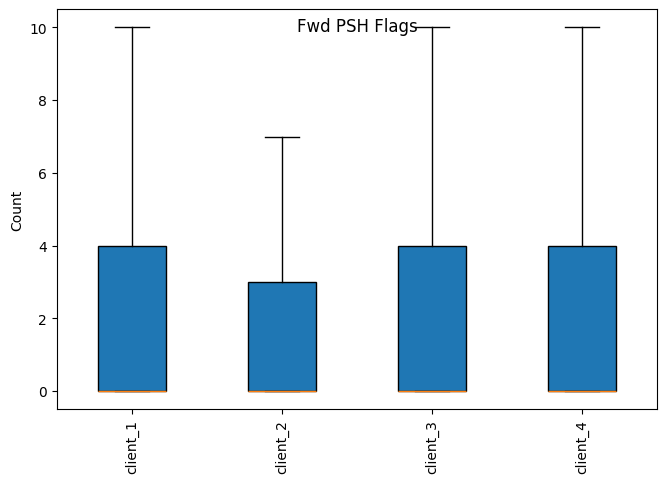

In [12]:

data = []
for key, element in clients.items():
    data.append(locals()[key]['Fwd PSH Flags']) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Fwd PSH Flags', '', 'Count', True)
draw_box_plot(data, tick_numbers, tick_list, 'Fwd PSH Flags', '', 'Count', False)

## Fwd Act Data Pkts: Count of packets with at least 1 byte of TCP data payload in the forward direction

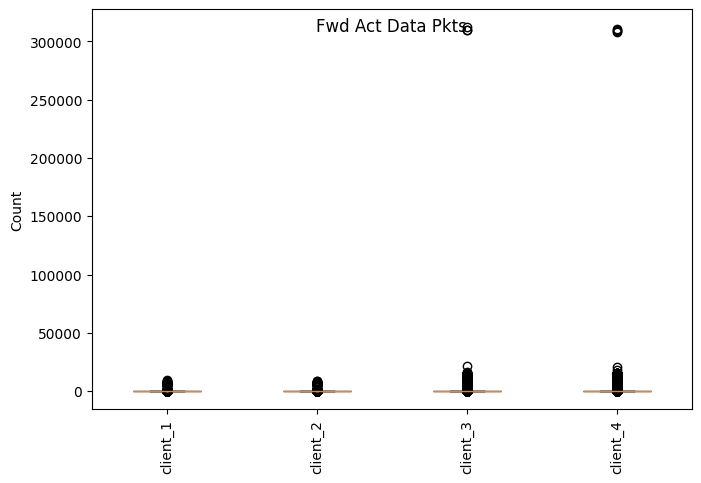

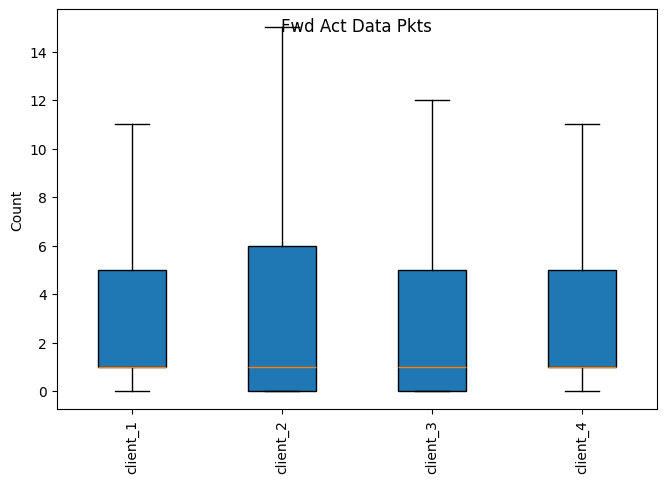

In [13]:
data = []
for key, element in clients.items():
    data.append(locals()[key]['Fwd Act Data Pkts']) #making it kbps from Byte/s

draw_box_plot(data, tick_numbers, tick_list, 'Fwd Act Data Pkts', '', 'Count', True)
draw_box_plot(data, tick_numbers, tick_list, 'Fwd Act Data Pkts', '', 'Count', False)

## Manual Feature Analysis

In [14]:
features = ['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length', 'Packet Length Min', 'Packet Length Max', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'ICMP Code', 'ICMP Type', 'Fwd TCP Retrans. Count', 'Bwd TCP Retrans. Count', 'Total TCP Flow Time']


In [15]:
client_1_dataset = locals()['client_1'].copy()

In [16]:
client_1_dataset = client_1_dataset[features]

In [40]:
def measure_correlation(df, co_efficent=0.2):
    # Calculate correlation matrix for numeric features
    correlation_matrix = df.corr()    
    # Find features with low correlation with other features
    # We use 0.2 as the threshold for weak correlation (you can adjust it as needed)

    # We use 0.2 as the threshold for weak correlation (you can adjust it as needed)
    independent_features = correlation_matrix[correlation_matrix.abs() < co_efficent].count().sort_values(ascending=False)
    
    # Create a DataFrame with the feature names and their respective counts of low-correlation (independent) scores
    independent_features_df = pd.DataFrame({
        'Feature': independent_features.index,
        'Score': independent_features.values
    })
     

    # Draw a heatmap for the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    
    # Display the heatmap
    plt.title('Correlation Matrix of Features')
    plt.show()
    return independent_features_df

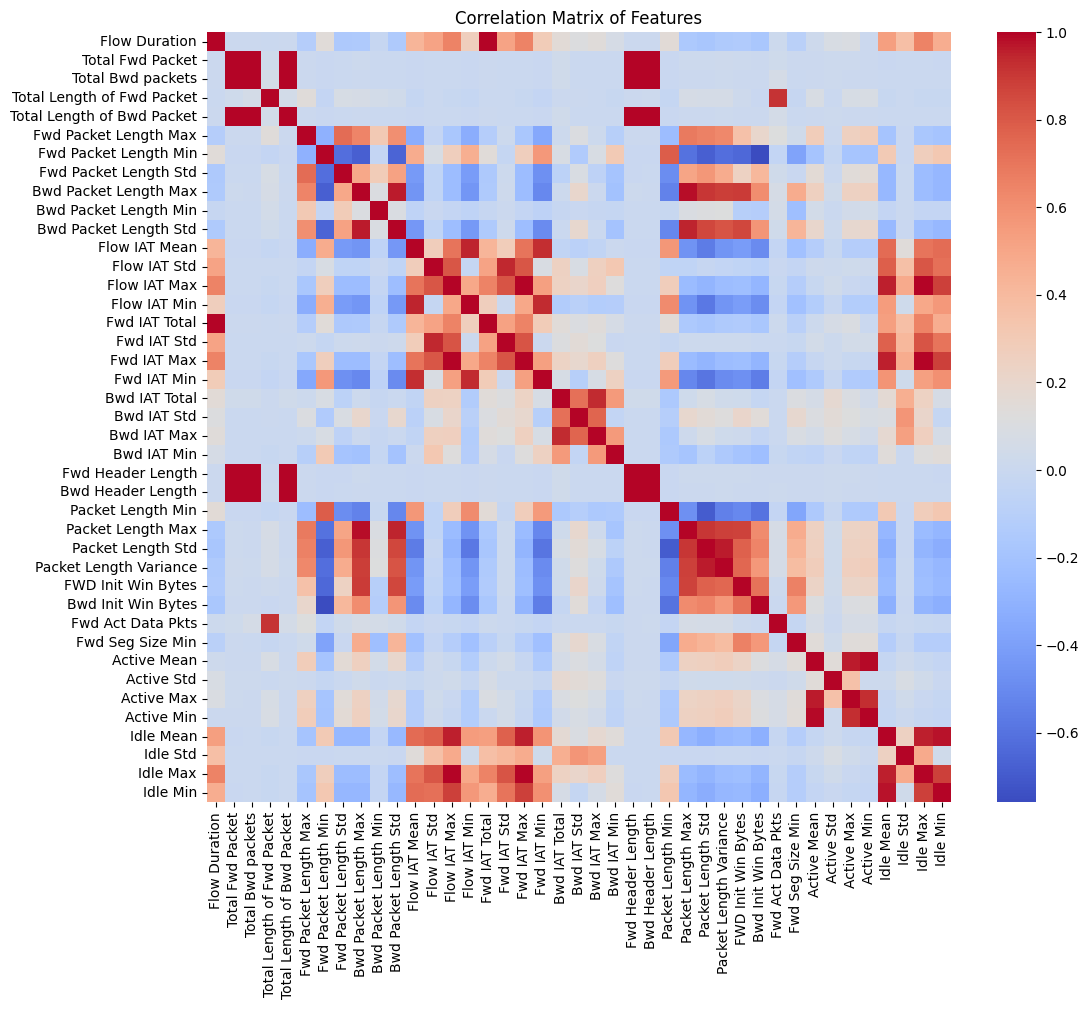

In [41]:
##IAT Features
test_features = ['Flow Duration' ,'Total Fwd Packet' ,'Total Bwd packets' ,'Total Length of Fwd Packet' ,'Total Length of Bwd Packet' ,'Fwd Packet Length Max' ,'Fwd Packet Length Min' ,'Fwd Packet Length Std' ,'Bwd Packet Length Max' ,'Bwd Packet Length Min' ,'Bwd Packet Length Std' ,'Flow IAT Mean' ,'Flow IAT Std' ,'Flow IAT Max' ,'Flow IAT Min' ,'Fwd IAT Total' ,'Fwd IAT Std' ,'Fwd IAT Max' ,'Fwd IAT Min' ,'Bwd IAT Total' ,'Bwd IAT Std' ,'Bwd IAT Max' ,'Bwd IAT Min' ,'Fwd Header Length' ,'Bwd Header Length' ,'Packet Length Min' ,'Packet Length Max' ,'Packet Length Std' ,'Packet Length Variance' ,'FWD Init Win Bytes' ,'Bwd Init Win Bytes' ,'Fwd Act Data Pkts' ,'Fwd Seg Size Min' ,'Active Mean' ,'Active Std' ,'Active Max' ,'Active Min' ,'Idle Mean' ,'Idle Std' ,'Idle Max' ,'Idle Min']
independent_features = measure_correlation(client_1_dataset[test_features], 0.01)

In [42]:
independent_features

,Feature,Score
0,Total Length of Bwd Packet,31
1,Bwd Header Length,31
2,Total Bwd packets,30
3,Fwd Header Length,27
4,Total Fwd Packet,24
5,Idle Std,21
6,Fwd IAT Std,12
7,Total Length of Fwd Packet,11
8,Bwd Packet Length Min,10
9,Fwd Act Data Pkts,9
